In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set modern responsive style
sns.set_theme(style="whitegrid", context="talk")

# --- Load dataset ---
df = pd.read_csv("../data/insurance.csv")

# --- Initial Exploration ---
print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Dataset Info ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())


--- First 5 Rows ---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

--- Descriptive Statistics ---
               age  

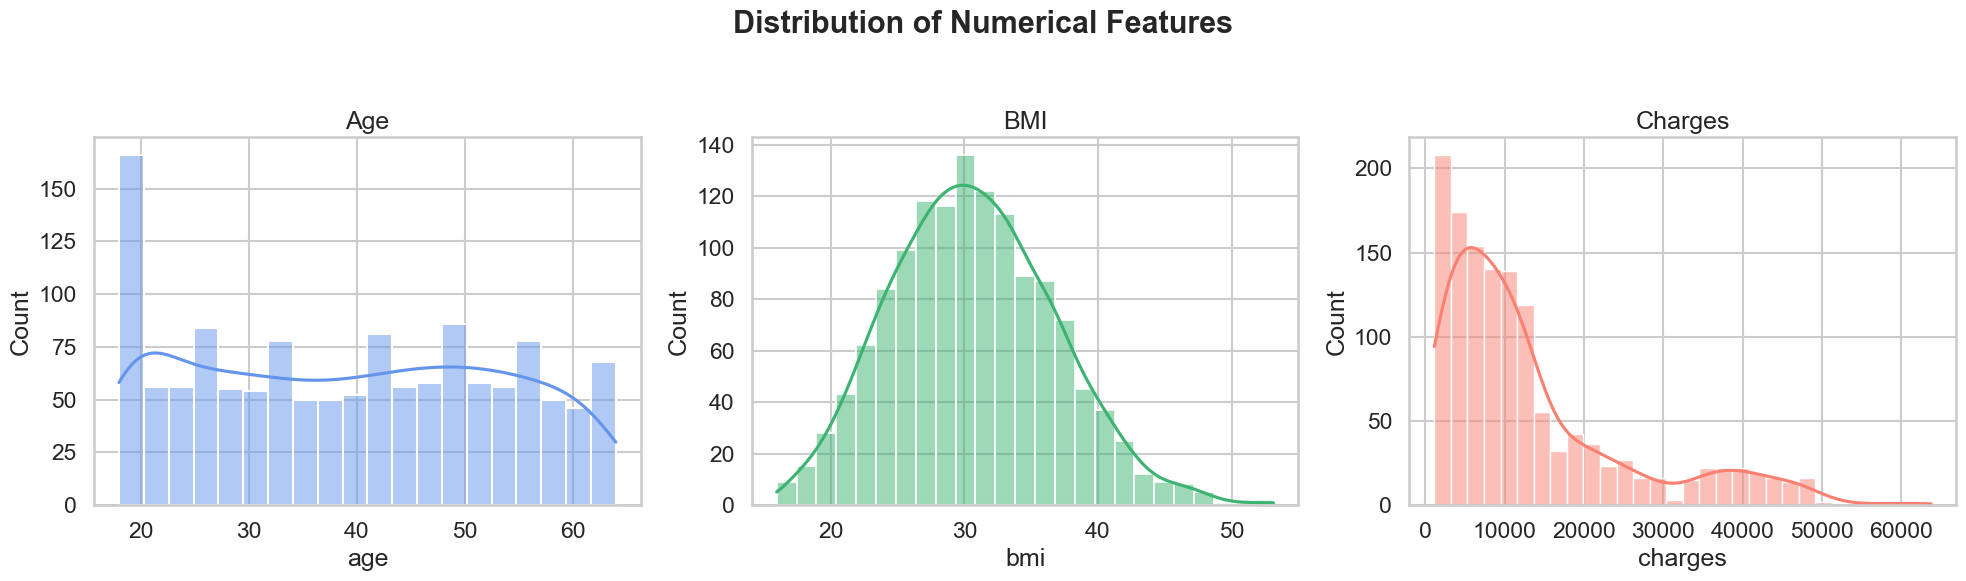

In [2]:
# -------------------------
# 1. Numerical Distributions
# -------------------------
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Distribution of Numerical Features", fontsize=22, fontweight="bold")

sns.histplot(df["age"], kde=True, bins=20, ax=axes[0], color="cornflowerblue")
axes[0].set_title("Age")

sns.histplot(df["bmi"], kde=True, bins=25, ax=axes[1], color="mediumseagreen")
axes[1].set_title("BMI")

sns.histplot(df["charges"], kde=True, bins=30, ax=axes[2], color="salmon")
axes[2].set_title("Charges")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

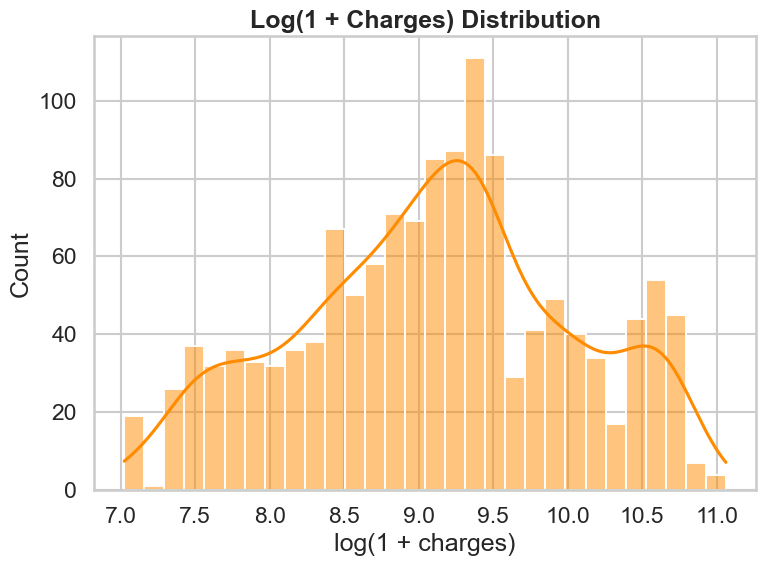

In [3]:
# -------------------------
# 2. Log-transformed Charges
# -------------------------
plt.figure(figsize=(8, 6))
sns.histplot(np.log1p(df["charges"]), kde=True, bins=30, color="darkorange")
plt.title("Log(1 + Charges) Distribution", fontsize=18, fontweight="bold")
plt.xlabel("log(1 + charges)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\prati\AppData\Local\Temp\ipykernel_19808\613662408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="children", data=df, palette="viridis")


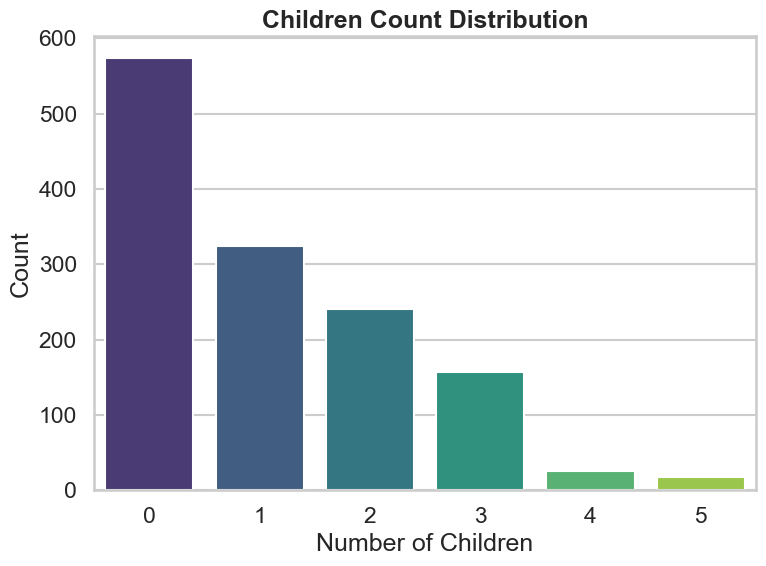

In [4]:
# -------------------------
# 3. Children Distribution
# -------------------------
plt.figure(figsize=(8, 6))
sns.countplot(x="children", data=df, palette="viridis")
plt.title("Children Count Distribution", fontsize=18, fontweight="bold")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\prati\AppData\Local\Temp\ipykernel_19808\1055958224.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="smoker", y="charges", data=df, ax=axes[0], palette="Set2")
C:\Users\prati\AppData\Local\Temp\ipykernel_19808\1055958224.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sex", y="charges", data=df, ax=axes[1], palette="Set2")
C:\Users\prati\AppData\Local\Temp\ipykernel_19808\1055958224.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="region", y="charges", data=df, ax=axes[2], palette="Set2")


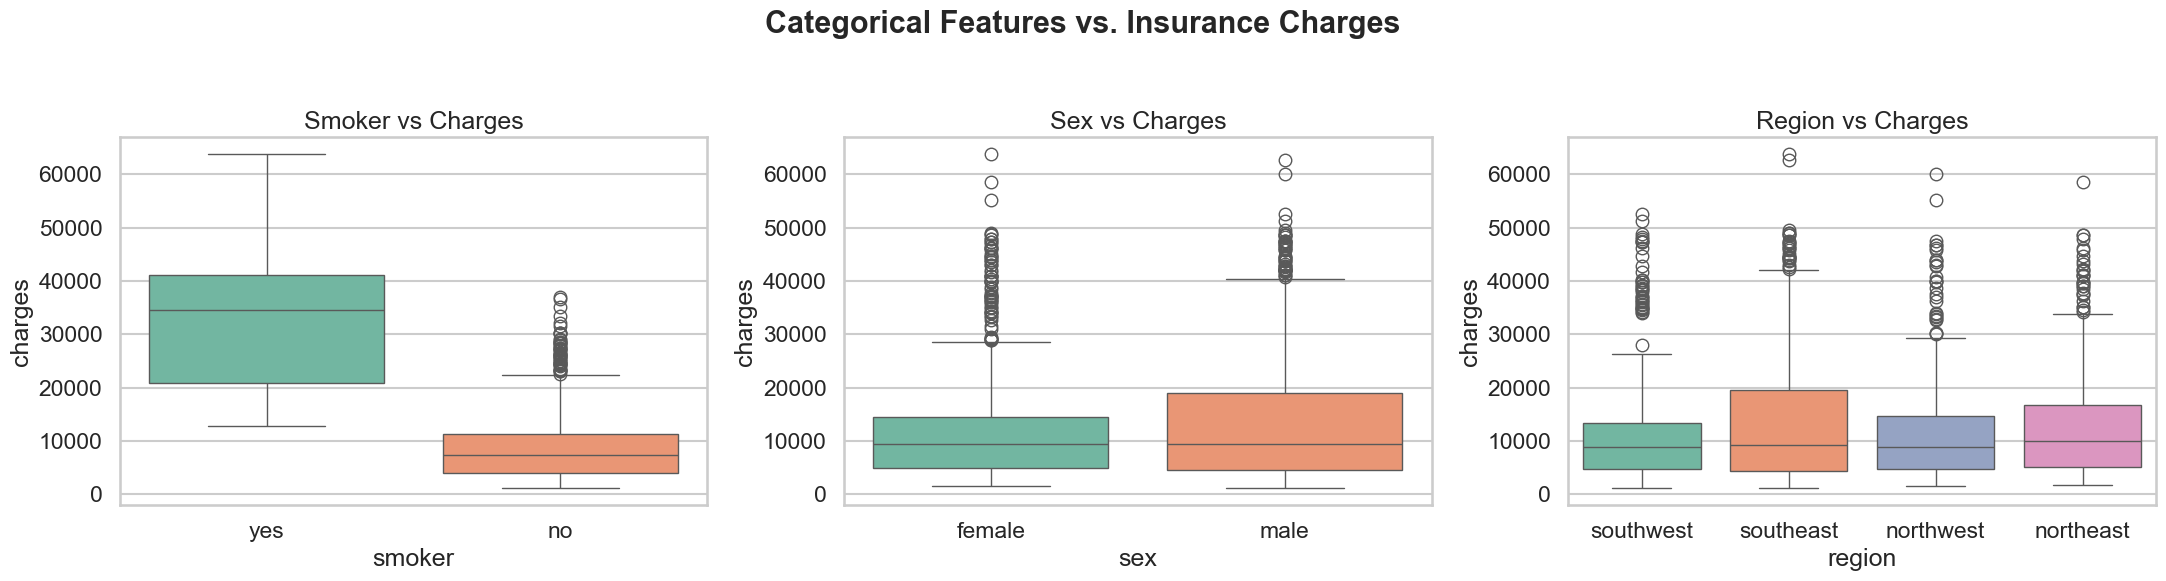

In [5]:
# -------------------------
# 4. Categorical Features vs Charges
# -------------------------
fig, axes = plt.subplots(1, 3, figsize=(22, 6))
fig.suptitle("Categorical Features vs. Insurance Charges", fontsize=22, fontweight="bold")

sns.boxplot(x="smoker", y="charges", data=df, ax=axes[0], palette="Set2")
axes[0].set_title("Smoker vs Charges")

sns.boxplot(x="sex", y="charges", data=df, ax=axes[1], palette="Set2")
axes[1].set_title("Sex vs Charges")

sns.boxplot(x="region", y="charges", data=df, ax=axes[2], palette="Set2")
axes[2].set_title("Region vs Charges")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [6]:
# -------------------------
# 5. Grouped Stats
# -------------------------
print("\n--- Charges grouped by smoker ---")
print(df.groupby("smoker")["charges"].describe())

print("\n--- Charges grouped by region ---")
print(df.groupby("region")["charges"].mean())


--- Charges grouped by smoker ---
         count          mean           std         min           25%  \
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803  
yes     34456.34845  41019.207275  63770.42801  

--- Charges grouped by region ---
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


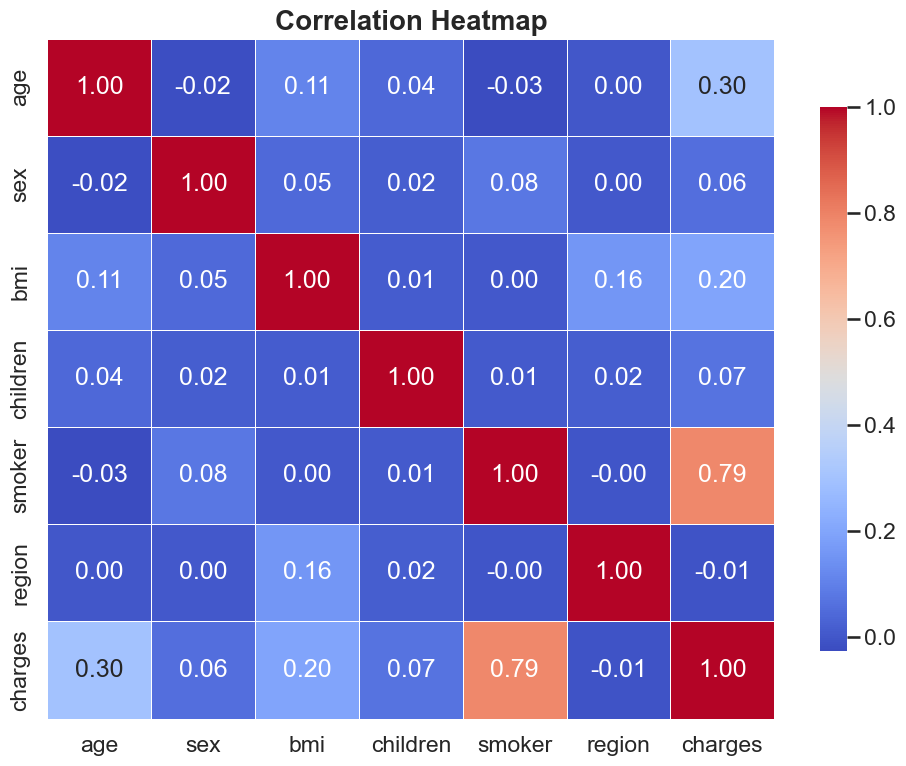

In [7]:
# -------------------------
# 6. Correlation Heatmap
# -------------------------
# Encode categorical cols
df_encoded = df.copy()
for col in ["sex", "smoker", "region"]:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

corr = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap", fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()